# Detecting Fake News with Python and Machine Learning ([Inspired by](https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/))

### My intent here is to build a model to accurately classify a piece of political news as REAL or FAKE. We're going to use [scikit-learn](https://scikit-learn.org/stable/) library to manipulate our dataset. In this project, we'll use TF-IDF vectorization and Passive-Agrassive Classifier in order to quantify and classify the words in the news.

In [ ]:
# Imports

import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
from sklearn import __version__
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Scikit-learn version
__version__

'1.0.1'

In [ ]:
mat.__version__

'3.2.2'

In [ ]:
sns.__version__

'0.11.2'

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
np.__version__

'1.19.5'

In [ ]:
# Loading Dataset

# Read the data
df = pd.read_csv('news.csv', encoding='utf-8')

# Shape and head of df
print(df.shape) # Output: (rows, columns)
df.head(10)

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
# Checking if there exists NaN values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
# Get labels
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

###**TF-IDF Vectorization**

TF-IDF stands for "**Term Frequency - Inverse Document Frequency**". It is a technique to **quantify** words in a set of documents. We generally compute a score for each word to signify its **importance** in the document and corpus. By vectorizing the documents we can further perform **multiple tasks** such as finding the relevant documents, ranking, clustering, etc.

**TF (Term Frequency)**: The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

**IDF (Inverse Document Frequency)**: Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus. 

[**Here**](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089) is a nice explanation about TF-IDF.

In [ ]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=.2, random_state=7)

Right below, we use a 'stop words' list, to **filter** the words that we are interested.
- **What are stop words?** The words which are generally filtered out before processing natural language (our news dataset) are called **stop words**. These are actually the most common words in **any language** (like articles, prepositions, pronouns, conjuctions, etc) and does not add much information to the text. Examples of a few stop words in English are 'the', 'a', 'an', 'so', 'what'.
- **Why do we remove stop words?** 
Stop words are available in abundance in any human language. By removing these words, we remove the low-level information, i.e., removing these words does not show any negative consequences on the model we train for our task. Removal of stop words definitely reduces the dataset size and thus reduces the training time due to fewer number of tokens (our words, in general) involved in the training.

Access [here](https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a#:~:text=What%20are%20stop%20words%3F&text=The%20words%20which%20are%20generally,much%20information%20to%20the%20text.) for more information

In [ ]:
# Initializing TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=.7)

# Fit and transform train set, transform test set
tfidf_train, tfidf_test = tfidf_vectorizer.fit_transform(x_train), tfidf_vectorizer.transform(x_test)

###Passive-Agressive Classifier

In simple words, a passive-agressive classifier algorithm works remaining passive for correct predictions and responds agressivley to incorrect predictions. 



In [ ]:
# Initialing PassiveAgressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Predicting on the test set and calculating the accuracy
y_prediction = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 93.05%


###Confusion Matrix 
A table that summarizes the performance of our classification algorithm

In [ ]:
# Building confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction, labels=['FAKE', 'REAL'])
c_matrix

array([[592,  46],
       [ 42, 587]])

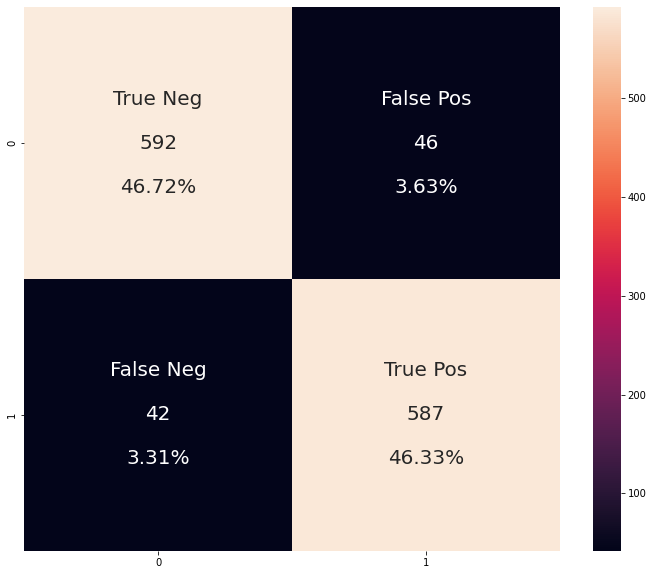

In [ ]:
# Visualization 
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten()/np.sum(c_matrix)]

labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape((2,2))

plt.figure(figsize=(12,10))
sns.heatmap(c_matrix, annot=labels, annot_kws={'size':20}, fmt='')